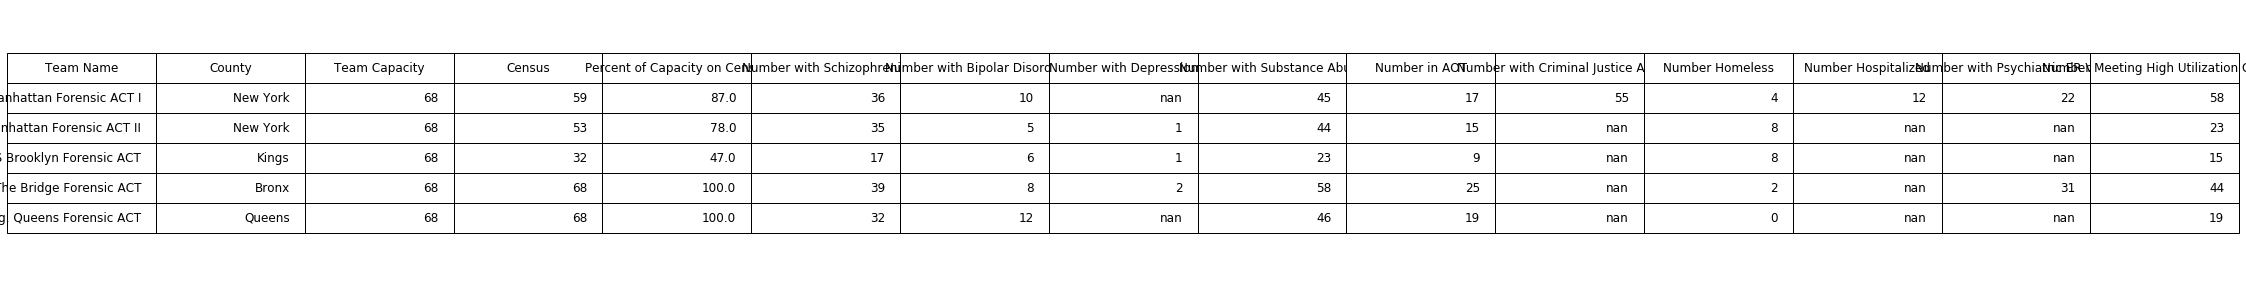

In [2]:
from urllib.request import urlopen
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
              
with urlopen('https://data.ny.gov/api/views/x5gj-r3vh/rows.json') as url:
  data = json.loads(url.read().decode())['data']
              
df = pd.DataFrame(data).iloc[:, np.r_[10:12, 13:16, 24:29, 30:35]]
df.columns = ['Team Name', 'County', 'Team Capacity', 'Census', 'Percent of Capacity on Census', 'Number with Schizophrenia', 'Number with Bipolar Disorder', 'Number with Depression', 'Number with Substance Abuse', 'Number in AOT', 'Number with Criminal Justice Activity', 'Number Homeless', 'Number Hospitalized', 'Number with Psychiatric ER Visits', 'Number Meeting High Utilization Criteria']
df.fillna(value=pd.np.nan, inplace=True)    
df['Percent of Capacity on Census'] = df['Percent of Capacity on Census'].apply(lambda x: "{:3.1f}".format(float(x)))
dfNYC = df.loc[df.County.isin(['Bronx', 'New York', 'Kings', 'Queens', 'Richmond'])]
dfFACT = df[df['Team Name'].str.contains('Forensic')]
              
#FACT Table
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

tblfact = ax.table(cellText=dfFACT.values, colLabels=df.columns, loc='center')
tblfact.auto_set_font_size(False)
tblfact.set_fontsize(12)
tblfact.scale(2, 2)
fig.set_size_inches(w=20, h=5)
fig.show()